In [13]:
import numpy as np
from MainFunctions import *
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from sklearn.cluster import MiniBatchKMeans
import cv2
from sklearn.cluster import KMeans 
import PIL.Image as image 

In [14]:
#original 512 x 512
i_width = 512
i_height = 512
input_shape = i_width*i_height
print(input_shape)

262144


In [15]:
x_trn = []
x_tst = []

AddImageToArray(x_trn ,'DICOM\PA1\ST1\SE4', (i_width, i_height))
AddImageToArray(x_tst ,'DICOM\PA5\ST1\SE4', (i_width, i_height))

x_trn = np.array(x_trn, np.float32)
x_tst = np.array(x_tst, np.float32)

In [87]:
def segmentation(images, shape, n_clusters = 4):
    segmentated_imgs = []
    for image in images[:25]:
        label = KMeans(n_clusters, n_init='auto').fit_predict(image.reshape(shape,-1))
        label = label.reshape([i_height,i_width]) 
        uniq_labels = np.unique(label)

        mid_count_labels = [np.count_nonzero(label == k ) for k in uniq_labels]
        sorts_labels = np.argsort(mid_count_labels)
        sorts_labels = np.delete(sorts_labels, 0, 0)
        sorts_labels = np.delete(sorts_labels, len(sorts_labels)-1, 0)
        max_values = [np.where(label ==l, image, 0).max() for l in sorts_labels]

        max_label_indx = np.argmax(max_values)
        mid_label = sorts_labels[max_label_indx]
        segmentated_imgs.append(np.where(label == mid_label, 1, 0))
    return np.array(segmentated_imgs)

In [88]:
segment = segmentation(x_trn, input_shape, 10)

In [89]:
print(x_trn.shape)
print(segment.shape)

(68, 512, 512)
(25, 512, 512)


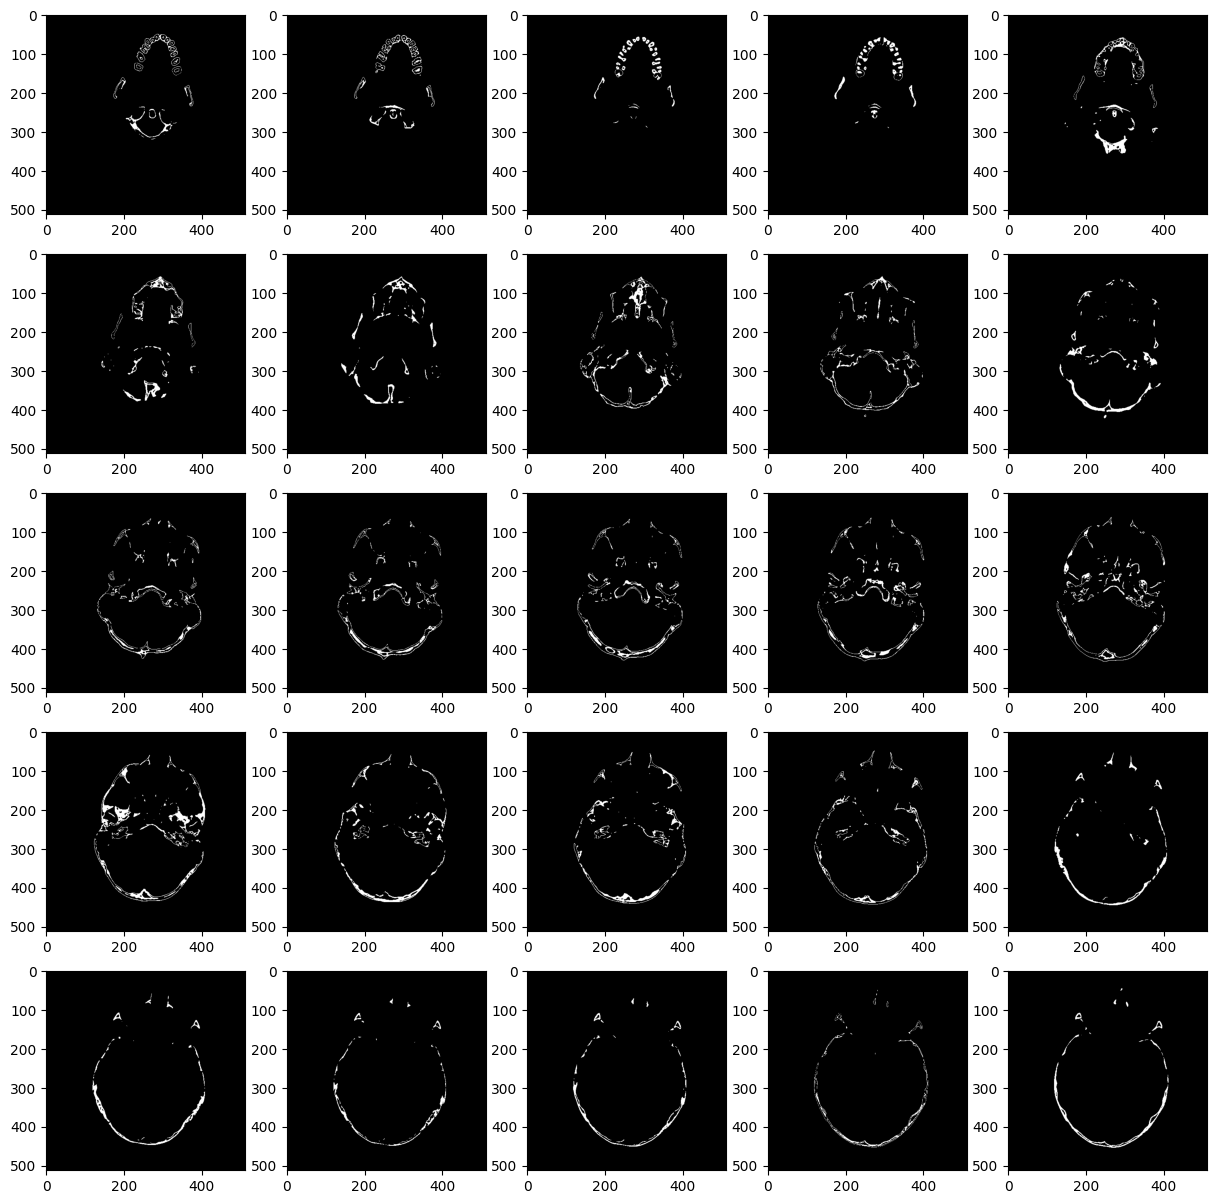

In [90]:
plt.figure(figsize=(15,15))
DrawImages(segment, 25, (5,5))